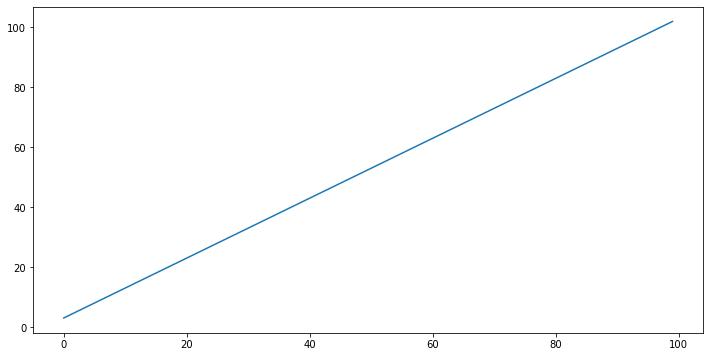

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102])

In [1]:
##lineAndRandomPoints
import numpy as np
import matplotlib.pyplot as plt

line = np.array([i + 3 for i in range(100)])
figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.show()
line

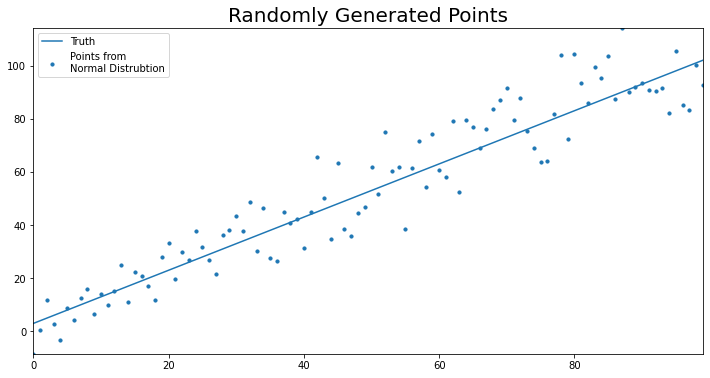

In [2]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, 10))

figure = plt.figure(figsize = (12, 6))
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.plot(line, label ="Truth")
plt.scatter(np.arange(len(points)), points, s = 10,
           label = "Points from\nNormal Distrubtion")
plt.title("Randomly Generated Points", fontsize = 20)
plt.legend(loc = "best")
plt.show()

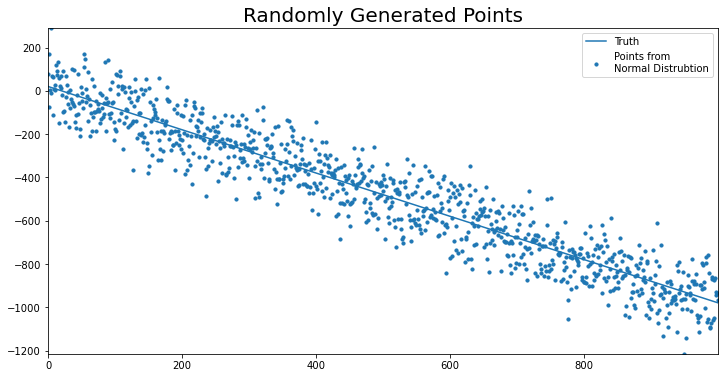

In [3]:
import random

def build_random_data_with_line(y_int, slope, SD = 1, line_length = 100):
    line = np.array([slope * i + y_int for i in range(line_length)])    
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
        
    return line, points

def plot_line(line, points, line_name = "Truth",
              title = "Randomly Generated Points"):

    figure = plt.figure(figsize = (12, 6))
    plt.rcParams["axes.xmargin"] = 0
    plt.rcParams["axes.ymargin"] = 0
    plt.plot(line, label =line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
               label = "Points from\nNormal Distrubtion")
    plt.title("Randomly Generated Points", fontsize = 20)
    plt.legend(loc = "best")
    plt.show()
    
line, points = build_random_data_with_line(y_int = 20, slope = -1, SD = 100, line_length = 1000)
plot_line(line, points)

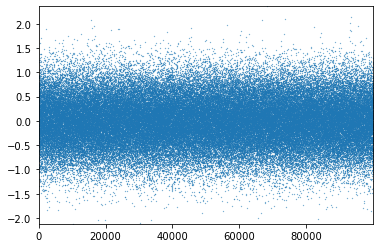

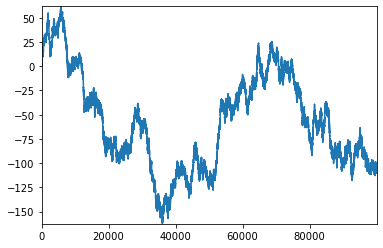

In [4]:
#montecarloSimulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


mu = 0
#SD is sigma, variance is sigma**2
sigma = .5
random_list = []
observations = 100000
for i in range(100000):
    random_list.append(random.normalvariate(mu, sigma))

plt.plot(random_list, ls = "",linewidth = 1, marker =".", markersize = .5)
plt.show()
plt.close()

simulation = [] 

for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i-1] + val)
        
plt.plot(simulation)
plt.show()
plt.close()



In [5]:
def run_monte_carlo(mean, sigma, num_sims, sim_dict, index):
    
    for i in range(num_sims):
        sim_dict[i] = {}
        for ix in index:
            sim_dict[i][ix] = random.normalvariate(mean, sigma)


In [6]:
mean = 0
sigma = 1
monte_carlo_sim_dict = {}
num_sims = 2000
index = np.arange(2000)
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, index)
        
monte_carlo_sim_df = (pd.DataFrame(monte_carlo_sim_dict))
        
monte_carlo_sim_df

0         1         2         3         4         5         6     \
0    -1.370891  0.415724  0.648296 -1.109753  1.407659 -0.890513 -2.105575   
1     1.085763 -0.070948  1.512403  1.204902 -1.316896 -1.559523 -1.152907   
2     0.557807  0.399862  1.528600  1.039688 -0.817937 -0.454915 -0.809619   
3    -0.501399 -0.942013  0.536701 -0.583182  2.010363  0.269014  1.192035   
4     1.330387  2.530792 -1.301963  0.584523  0.825302  0.913791 -0.287280   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.213842 -1.174995  1.904190 -1.377242 -0.826659 -0.028298 -1.786162   
1996  0.783040  1.027747 -0.608814  1.880489  0.286665  0.172775  0.432547   
1997  1.726708 -2.137683  0.576034 -0.102903 -0.021918  0.976108  0.178411   
1998  1.984345  1.520687 -0.470102 -0.027600  0.071444  1.166152 -1.353455   
1999  0.750511 -1.517325  0.466990 -1.700627  1.210135  0.803905 -0.590230   

          7         8         9     ...      1990      1991      1992  \
0     0.201083  0.463443 -0.069917  ... -0.197479 -2.314999 -0.522576   
1    -0.072968  0.061860  0.700959  ...  0.290225 -0.141780 -0.271469   
2     1.876820 -0.281762  0.538113  ...  1.353550  0.344848 -1.132435   
3     0.676426 -0.647586  0.269994  ... -0.683370  1.387629 -0.693534   
4    -0.132002 -0.533964  0.258494  ... -0.404269 -0.598424 -2.003719   
...        ...       ...       ...  ...       ...       ...       ...   
1995 -0.795356 -0.547686  1.162498  ...  0.137565  0.495767 -0.645857   
1996 -1.555247 -1.226651 -0.800755  ...  0.489899  0.185889 -0.028224   
1997  0.853216  1.241230  0.342573  ...  1.925969 -0.461830  1.071851   
1998 -0.549646 -0.528627 -0.683716  ...  0.177011  1.019227  1.597030   
1999 -0.336233 -0.319080 -1.647973  ...  0.321124  0.832604  1.148097   

          1993      1994      1995      1996      1997      1998      1999  
0     1.029754  0.893539 -0.908186  0.631189  0.920780 -1.936496 -0.015007  
1     0.696804 -0.222629  0.957665  0.648289  1.108966  0.657252 -1.391898  
2    -0.310170 -1.056602  0.178370 -0.535970 -1.295462  0.874468 -0.727889  
3     2.393140  0.166091  0.871938  3.269103  1.060297 -1.695819  2.646208  
4    -1.075817 -0.294290 -0.835821 -0.196709  0.283676 -0.834567  0.081814  
...        ...       ...       ...       ...       ...       ...       ...  
1995  1.014700 -0.484513  0.434158 -1.353356 -1.181224  0.477118  1.459293  
1996  0.623160  0.181296  0.623986  0.526102  0.337986  0.334505  0.442366  
1997  2.026654 -1.457106 -0.878055  0.966976 -0.305023 -0.686744  0.027595  
1998  0.174319 -0.257571 -0.034977 -2.088491  0.545948 -0.405220  1.321660  
1999  0.513948  2.225019 -0.935031 -0.285269  1.030710  2.008754 -0.274127  

[2000 rows x 2000 columns]

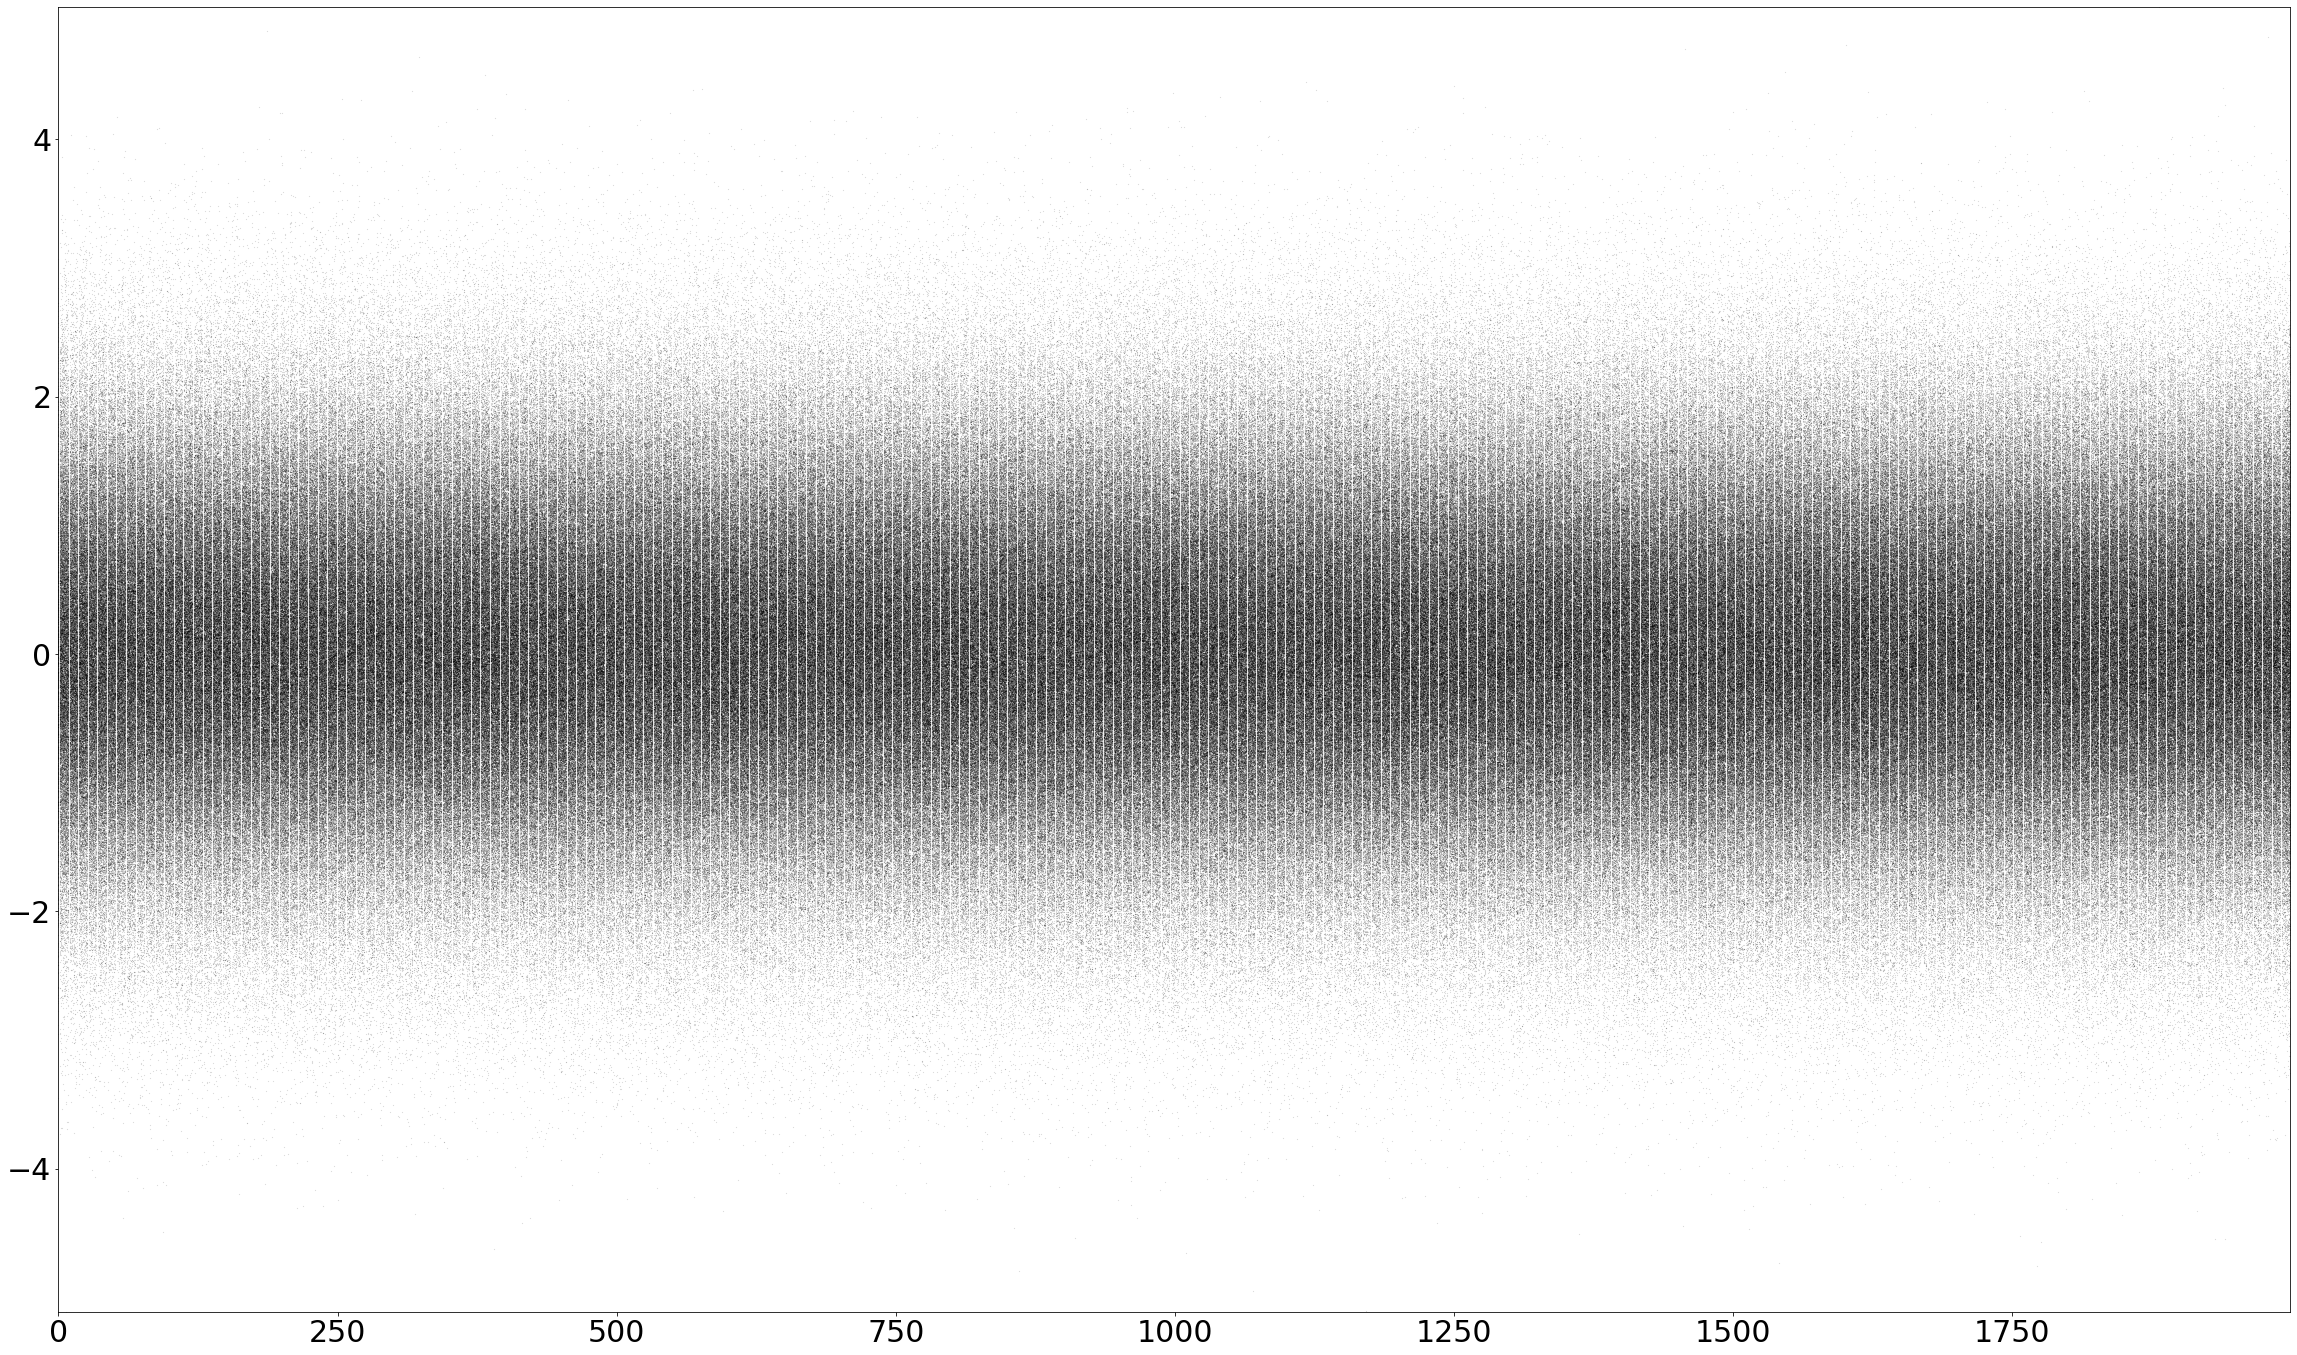

In [7]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["font.size"] = 30

fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.plot.line(legend = False, ls = " ", marker=".", markersize = .2, 
                            color ="k", alpha = .5, ax = ax)

plt.show()

<ipython-input-8-d93dfd6ebd52>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


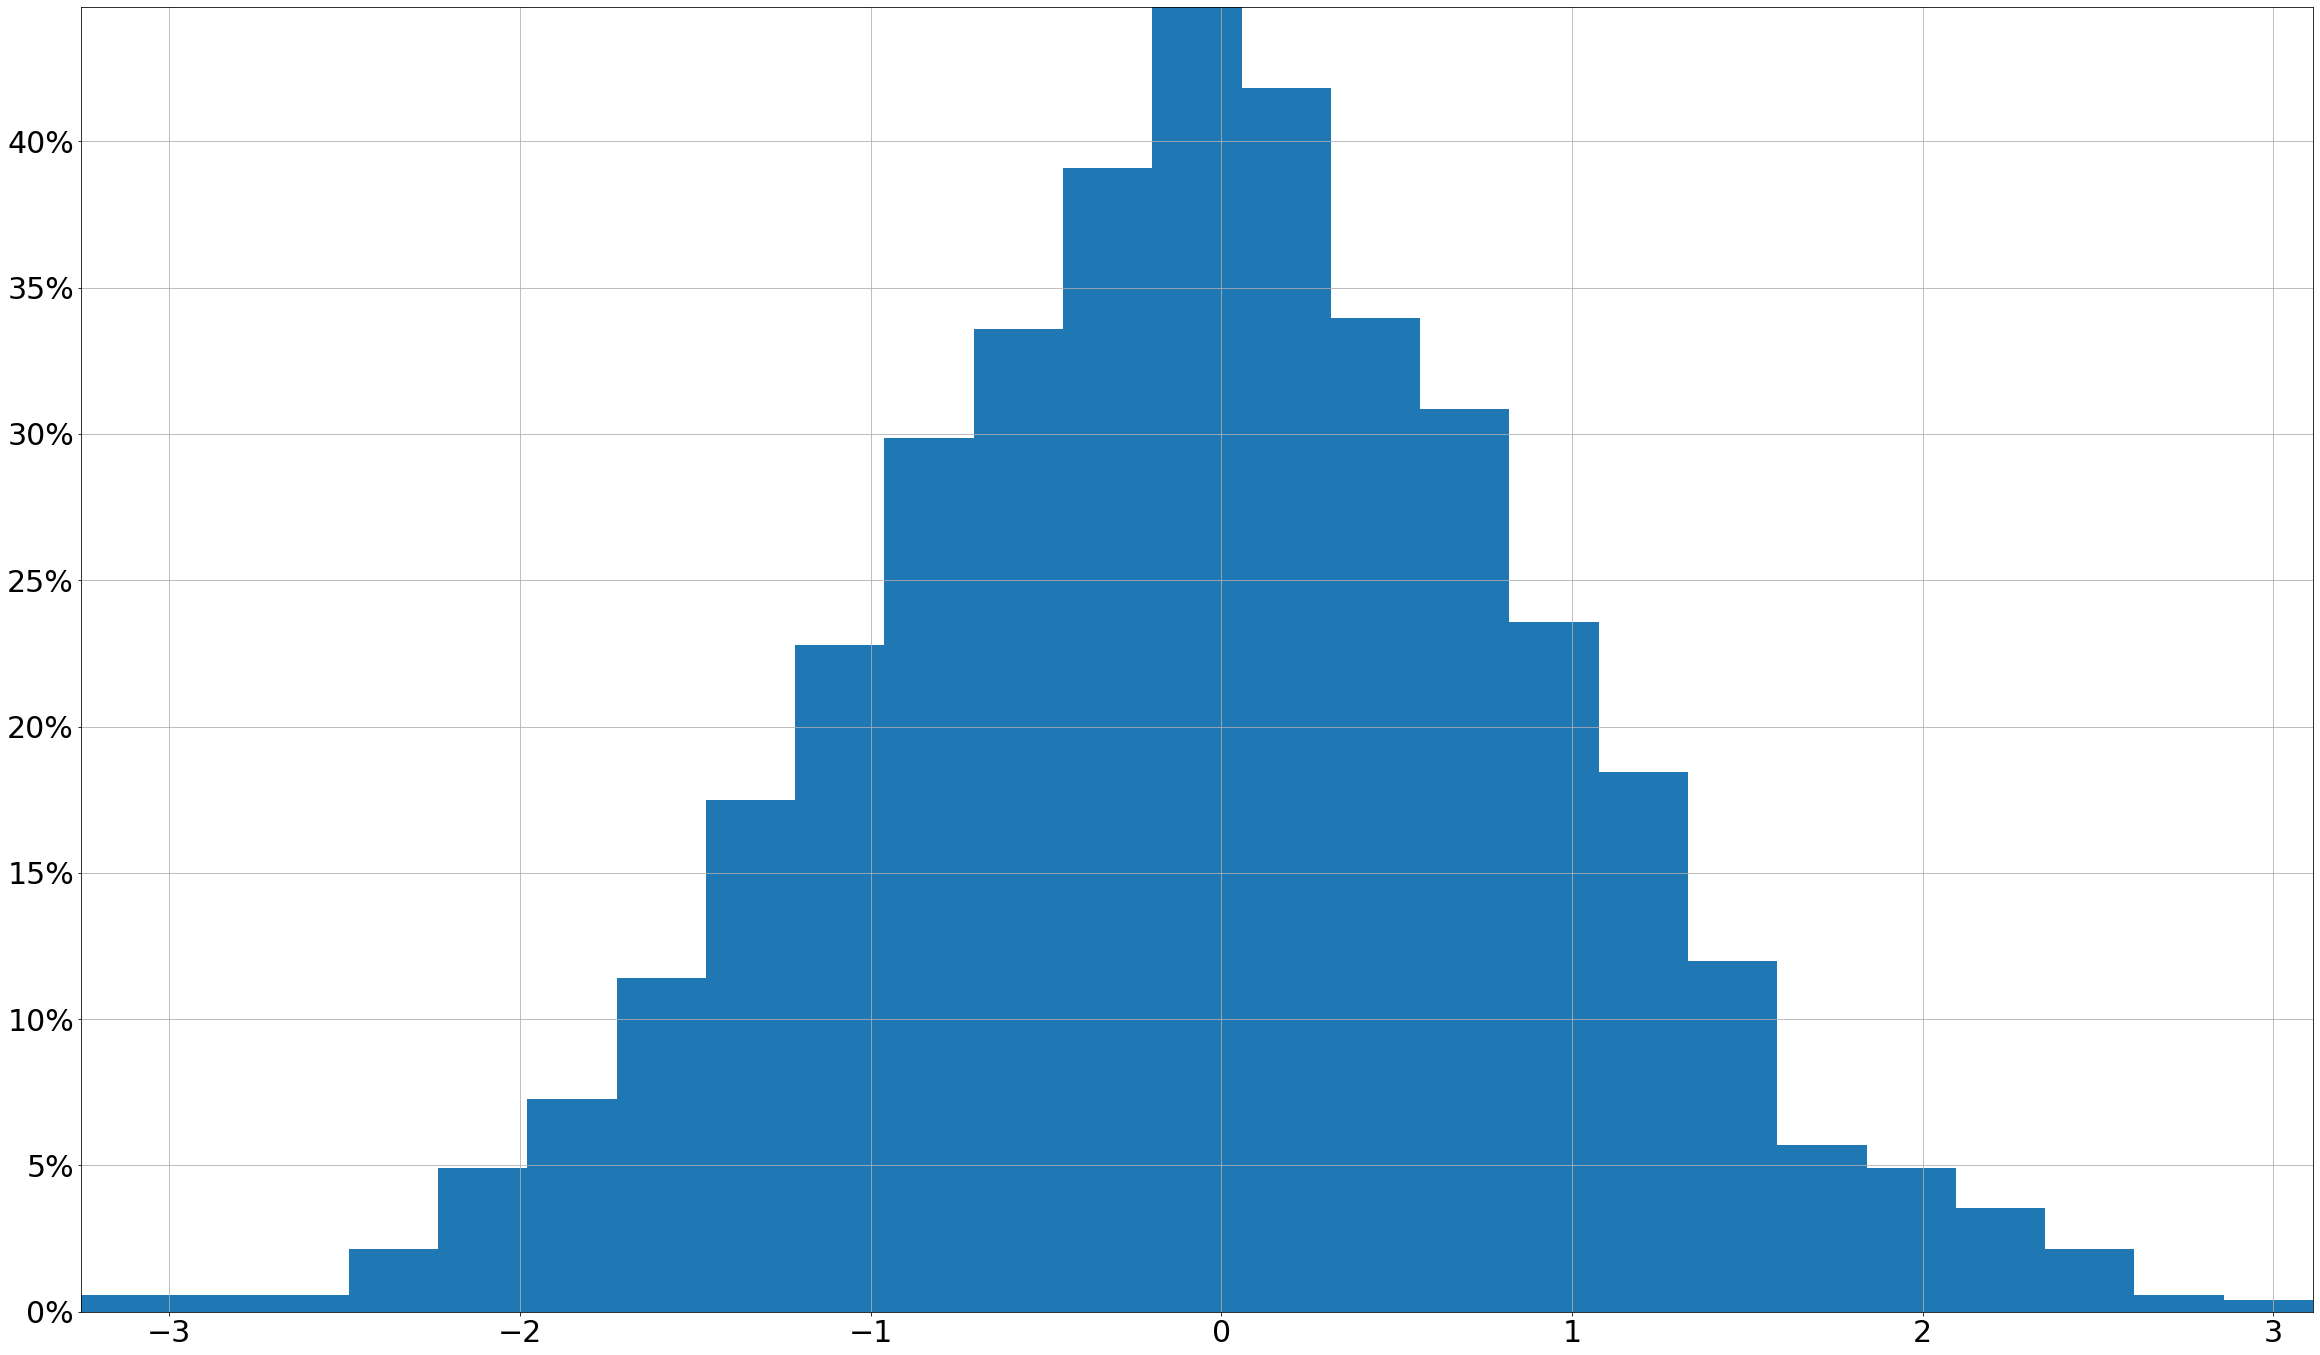

In [8]:
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.iloc[-1].hist(bins = 25, density = True,
                                ax = ax)

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
plt.show()
plt.close()

## Monte Carlo with a Positive Trend

In [11]:
mean = 0.05
sigma = .5
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 2000
index = np.arange(periods)
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, index)
pd.DataFrame(monte_carlo_sim_dict)


0         1         2         3         4         5         6     \
0     0.726942 -0.803943  0.297467 -0.821196 -0.470914  0.736823  0.630578   
1    -0.226412  0.893288  0.783365 -0.273885 -0.027152  0.410352  0.081718   
2    -0.303499  0.634468  0.400865  0.277464  0.104142  0.407440 -0.648247   
3     0.281013  0.104443  0.504095 -0.910708  0.802742 -0.227996 -0.041459   
4     0.364246  0.282631  0.726921 -0.093248  0.167645  0.167713  0.525988   
...        ...       ...       ...       ...       ...       ...       ...   
1995 -0.193081 -0.232539  0.142508 -0.494233 -0.902130 -0.080958  0.500933   
1996  0.028336 -0.096986  0.162636 -0.349187  0.583135 -0.533363  0.611887   
1997  0.574007 -0.627652 -0.527240 -0.191396  0.610783  0.027519 -0.169027   
1998  0.445825  0.407211 -0.153483  0.001439 -0.219172  0.162946 -0.214391   
1999  0.374645  1.197885  0.450755  0.912935  0.766148 -0.602295 -0.336334   

          7         8         9     ...      1990      1991      1992  \
0    -0.410546  0.114535  0.430689  ...  0.212099  0.036472  0.121570   
1     0.244183  0.735177 -0.175560  ... -0.314746  1.123084 -0.445061   
2     0.280728  0.302747  0.829010  ... -0.272233 -0.406845  0.770340   
3     0.770803  0.211987 -0.483033  ... -0.086229  0.132745  1.191299   
4     0.333151 -0.150038 -0.032187  ... -0.103338  0.518004  0.551085   
...        ...       ...       ...  ...       ...       ...       ...   
1995  0.110803  0.043869 -0.744504  ... -0.229892 -1.354597  0.452871   
1996  0.171469 -0.676746  0.732135  ... -0.196832  0.201270 -0.141181   
1997 -0.236881  1.269284 -0.241304  ...  0.255094  0.470794  0.767332   
1998  0.147993  0.172270  0.258906  ...  0.448757 -0.431442  0.004510   
1999  0.308684  0.624416 -0.755833  ...  0.344077  0.444507 -0.350213   

          1993      1994      1995      1996      1997      1998      1999  
0    -0.780437 -0.475531  0.912603 -0.032824 -0.226650 -0.511821 -0.565175  
1     0.161424  0.332156 -0.015434  0.910205  0.361783  0.269305 -0.493344  
2    -0.029590  0.218745 -0.214649  0.487328 -0.229503  0.068679 -0.032060  
3     0.682629  0.478568  0.590508  1.011328 -1.000188  0.724840 -0.226761  
4    -0.241798  0.180211  0.675227 -0.621214  1.061105  0.717986 -0.005357  
...        ...       ...       ...       ...       ...       ...       ...  
1995 -0.044566 -0.002808  0.535778 -0.860437  0.316489  0.228957 -0.171735  
1996  0.622422  0.524816  0.582853 -0.153181  1.060619 -0.224938  0.466753  
1997  0.115943 -0.006378  0.333008 -0.261344 -0.264198 -0.606430 -0.166435  
1998 -0.930780  0.074610 -0.869547 -0.268497  0.945988  0.014501 -0.755207  
1999  0.445453  0.219117  0.539901 -0.093709  0.710445  1.188444  0.453604  

[2000 rows x 2000 columns]

In [12]:
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).cumsum()
monte_carlo_sim_df

0           1          2           3           4          5     \
0      0.726942   -0.803943   0.297467   -0.821196   -0.470914   0.736823   
1      0.500530    0.089345   1.080832   -1.095081   -0.498066   1.147175   
2      0.197031    0.723814   1.481698   -0.817618   -0.393924   1.554615   
3      0.478044    0.828256   1.985792   -1.728325    0.408818   1.326619   
4      0.842290    1.110887   2.712713   -1.821574    0.576463   1.494333   
...         ...         ...        ...         ...         ...        ...   
1995  91.185671  115.340797  88.649443  117.691155  127.800155  85.363142   
1996  91.214008  115.243812  88.812079  117.341968  128.383290  84.829779   
1997  91.788015  114.616160  88.284839  117.150572  128.994073  84.857298   
1998  92.233840  115.023371  88.131356  117.152011  128.774900  85.020244   
1999  92.608485  116.221256  88.582112  118.064946  129.541048  84.417949   

           6          7           8           9     ...        1990  \
0      0.630578  -0.410546    0.114535    0.430689  ...    0.212099   
1      0.712296  -0.166363    0.849713    0.255130  ...   -0.102647   
2      0.064049   0.114365    1.152459    1.084140  ...   -0.374880   
3      0.022590   0.885167    1.364446    0.601107  ...   -0.461109   
4      0.548579   1.218319    1.214408    0.568920  ...   -0.564446   
...         ...        ...         ...         ...  ...         ...   
1995  73.327151  57.867225  109.753529  100.804020  ...  129.824731   
1996  73.939039  58.038694  109.076783  101.536155  ...  129.627899   
1997  73.770012  57.801814  110.346067  101.294851  ...  129.882992   
1998  73.555620  57.949807  110.518337  101.553757  ...  130.331749   
1999  73.219286  58.258491  111.142753  100.797924  ...  130.675826   

           1991        1992        1993       1994       1995       1996  \
0      0.036472    0.121570   -0.780437  -0.475531   0.912603  -0.032824   
1      1.159555   -0.323491   -0.619013  -0.143374   0.897169   0.877381   
2      0.752710    0.446848   -0.648604   0.075371   0.682519   1.364709   
3      0.885455    1.638147    0.034025   0.553939   1.273027   2.376037   
4      1.403460    2.189232   -0.207773   0.734150   1.948254   1.754823   
...         ...         ...         ...        ...        ...        ...   
1995  92.354485  105.237458  104.458840  57.800112  98.245827  89.627347   
1996  92.555755  105.096276  105.081262  58.324928  98.828680  89.474167   
1997  93.026549  105.863609  105.197205  58.318551  99.161689  89.212823   
1998  92.595107  105.868119  104.266426  58.393161  98.292141  88.944326   
1999  93.039613  105.517906  104.711879  58.612278  98.832042  88.850617   

           1997       1998       1999  
0     -0.226650  -0.511821  -0.565175  
1      0.135132  -0.242516  -1.058519  
2     -0.094371  -0.173837  -1.090579  
3     -1.094559   0.551003  -1.317340  
4     -0.033454   1.268989  -1.322697  
...         ...        ...        ...  
1995  96.443554  80.280005  72.545510  
1996  97.504173  80.055066  73.012263  
1997  97.239975  79.448636  72.845828  
1998  98.185963  79.463137  72.090621  
1999  98.896408  80.651581  72.544225  

[2000 rows x 2000 columns]

In [16]:
def plot_monte_carlo_sim(sim_data, 
                         title = None,
                        logy = True):
    sim_data["mean"] = sim_data.mean(axis=1)
    fig, ax = plt.subplots(figsize = (40, 24))
    sim_data.drop("mean", inplace = False, axis = 1).plot.line(
        legend = False, 
        marker = ".", 
        markersize = .1, 
        color = "k",
        alpha = 0.05, 
        logy = logy, 
        ax = ax)
    sim_data["mean"].plot.line(
        legend = False, 
        color ="C3",
        linewidth = 5,
        logy = logy,
        ax = ax
    )
    
    plt.title(title, fontsize = 50)
    plt.show()
    plt.close()
    

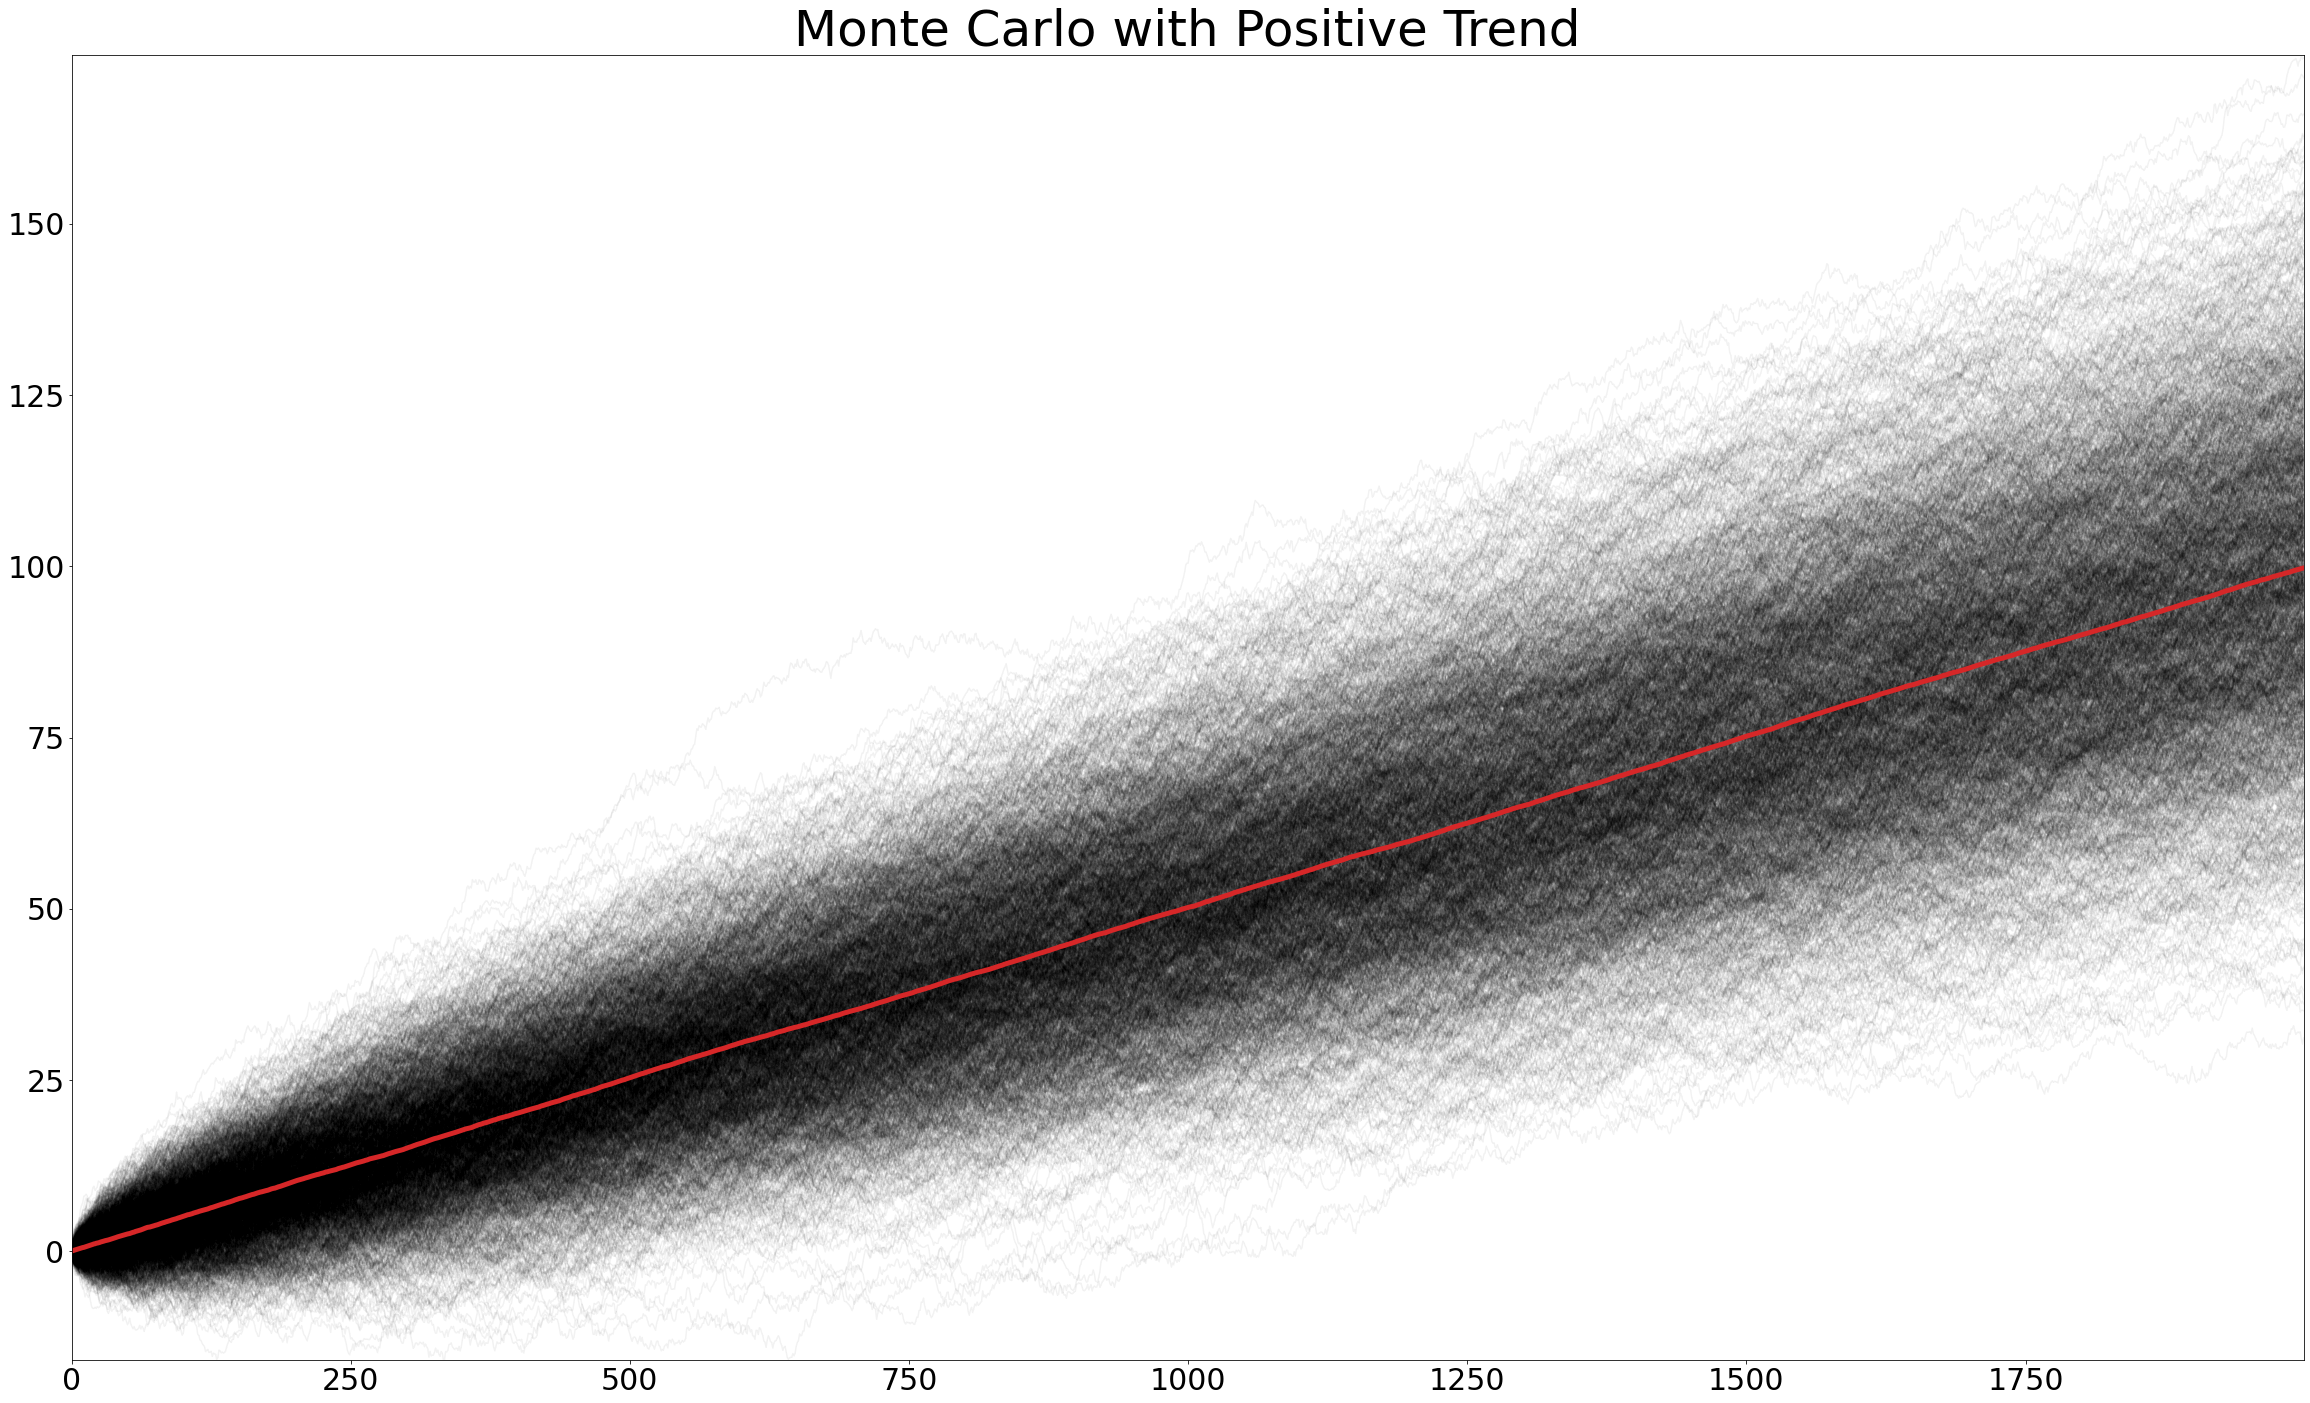

In [17]:
plot_monte_carlo_sim(monte_carlo_sim_df,
                    title = "Monte Carlo with Positive Trend",
                    logy = False)

In [19]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2005, 1, 1)
end = datetime.datetime.today()
data_dict = {}
stocks = "MSFT", "AAPL", "IBM", "GOOG"
for name in stocks:
    data_dict[name] = web.DataReader(name, "yahoo", start, end)
data_dict

{'MSFT':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2005-01-03   26.950001   26.650000   26.799999   26.740000   65002900.0   
 2005-01-04   27.100000   26.660000   26.870001   26.840000  109442100.0   
 2005-01-05   27.100000   26.760000   26.840000   26.780001   72463500.0   
 2005-01-06   27.059999   26.639999   26.850000   26.750000   76890500.0   
 2005-01-07   26.889999   26.620001   26.820000   26.670000   68723300.0   
 ...                ...         ...         ...         ...          ...   
 2021-11-23  339.450012  333.559998  337.049988  337.679993   30427600.0   
 2021-11-24  338.160004  333.910004  336.279999  337.910004   21661300.0   
 2021-11-26  337.929993  328.119995  334.350006  329.679993   24217200.0   
 2021-11-29  339.029999  334.739990  334.940002  336.630005   28534600.0   
 2021-11-30  337.779999  330.559998  335.320007  331.195007   12085960.0   
 
  

In [21]:
close_data_dict = {key:val["Close"] for key, val in data_dict.items()}
close_data_df = pd.DataFrame(close_data_dict)
close_data_df

MSFT        AAPL         IBM         GOOG
Date                                                       
2005-01-03   26.740000    1.130179   93.451241   100.976517
2005-01-04   26.840000    1.141786   92.447418    96.886841
2005-01-05   26.780001    1.151786   92.256210    96.393692
2005-01-06   26.750000    1.152679   91.969406    93.922951
2005-01-07   26.670000    1.236607   91.567879    96.563057
...                ...         ...         ...          ...
2021-11-23  337.679993  161.410004  116.790001  2935.139893
2021-11-24  337.910004  161.940002  116.730003  2934.350098
2021-11-26  329.679993  156.809998  115.809998  2856.120117
2021-11-29  336.630005  160.240005  118.500000  2922.280029
2021-11-30  331.195007  163.050003  117.815002  2886.399902

[4258 rows x 4 columns]

In [23]:
close_data_pct_change = close_data_df.pct_change()
close_data_pct_change

MSFT      AAPL       IBM      GOOG
Date                                              
2005-01-03       NaN       NaN       NaN       NaN
2005-01-04  0.003740  0.010270 -0.010742 -0.040501
2005-01-05 -0.002235  0.008758 -0.002068 -0.005090
2005-01-06 -0.001120  0.000775 -0.003109 -0.025632
2005-01-07 -0.002991  0.072811 -0.004366  0.028109
...              ...       ...       ...       ...
2021-11-23 -0.006327  0.002422  0.002747 -0.002186
2021-11-24  0.000681  0.003284 -0.000514 -0.000269
2021-11-26 -0.024356 -0.031678 -0.007881 -0.026660
2021-11-29  0.021081  0.021874  0.023228  0.023164
2021-11-30 -0.016145  0.017536 -0.005781 -0.012278

[4258 rows x 4 columns]